# Digit Recognizer using CNN

We will be experimenting similar kind of CNN as given in the figure. 

<img src = "leNet5_2.png"/>

In [1]:
### Import Important Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from PIL import Image
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
### Load Data
path = '/media/mrityunjay/ExpandableDrive/EDUCATIONAL/CSE/Artificial Intelligence and Probability&Statistics/Datasets/digit-recognizer/'
df = pd.read_csv(path + 'train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
### Separate X and Y i.e image (X) and label (Y)
# Here image is flattened already.
X = df.drop(['label'], axis = 1).values
Y = df['label'].values

In [5]:
### Import more data :)
import gzip
import pickle

# Link to this data
# http://academictorrents.com/details/323a0048d87ca79b68f12a6350a57776b6a3b7fb

with gzip.open('mnist-pkl-gz/mnist.pkl.gz', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    train_set,validation_set,test_set = u.load()

# Each set i.e train, validation and test has images and labels
# extract images in X and labels in Y
X1, Y1 = train_set
X2, Y2 = validation_set
X3, Y3 = test_set

In [6]:
### Combine both the digit datasets
X = np.vstack((X,X1,X2,X3))
Y = np.hstack((Y,Y1,Y2,Y3))

In [7]:
# Image dataset has 1,12,000 samples
# and 784 features
X.shape

(112000, 784)

In [8]:
### Convert flattened arrays to 2-D arrays
# Since we are going to use CNN
X_ = np.reshape(X, (X.shape[0], 28, 28))

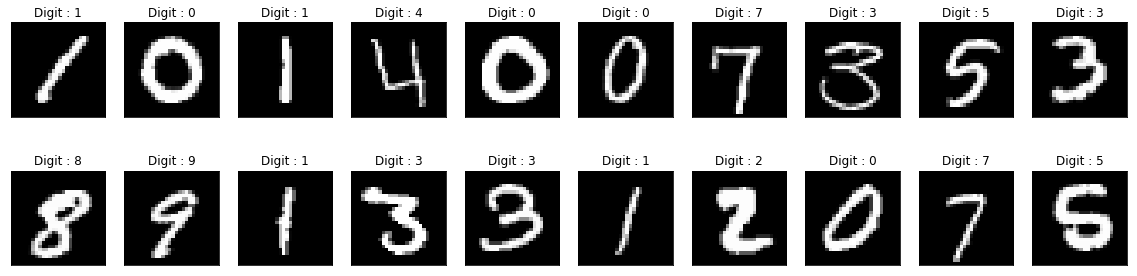

In [9]:
### Visualize some data
fig = plt.figure(figsize = (20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.title('Digit : '+ str(Y[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_[i], cmap = 'gray')

In [10]:
### Split dataset into train and test set.
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y, test_size = 0.2, random_state = 1)

In [11]:
# Now we have 89,600 images and each of shape 28X28
X_train.shape

(89600, 28, 28)

In [12]:
# We will be adding channel layer for each 2-D array.
# Converting them into 3-D array.
# Each image has Height = 28
#                Width  = 28
#    Number of Channels = 1

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
### Define the model and it's layers.
# You can experiment here for better accuracy.

model = tf.keras.models.Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3), padding = 'same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [19]:
# We are using 'Adam' optimizer.
# Since each image has only one label, so use 'sparse_categorical_crossentropy' loss.
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
### Outline of the CNN architecture.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [21]:
### Train the model on train set
model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
89600/89600 [==============================] - 60s 675us/sample - loss: 0.6260 - acc: 0.8320
Epoch 2/5
89600/89600 [==============================] - 61s 680us/sample - loss: 0.1399 - acc: 0.9617
Epoch 3/5
89600/89600 [==============================] - 61s 685us/sample - loss: 0.1071 - acc: 0.9718
Epoch 4/5
89600/89600 [==============================] - 62s 689us/sample - loss: 0.0876 - acc: 0.9768
Epoch 5/5
89600/89600 [==============================] - 63s 708us/sample - loss: 0.0824 - acc: 0.9791


In [22]:
### Evaluate the model on Test set.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

22400/22400 [==============================] - 4s 199us/sample - loss: 0.0758 - acc: 0.9835
Test accuracy: 0.98352677


In [23]:
# Record the predictions for test set
predictions = model.predict(X_test)

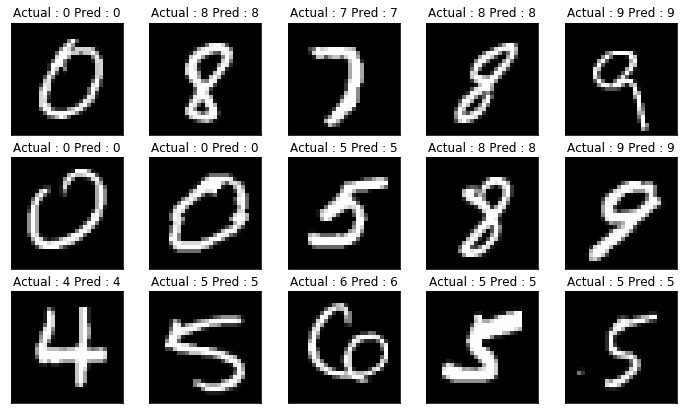

In [24]:
# Plot the predictions

fig = plt.figure(figsize=(12,7))

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.title('Actual : '+str(Y_test[i])+' Pred : '+str(np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X_test[i],(28, 28)), cmap = 'gray')

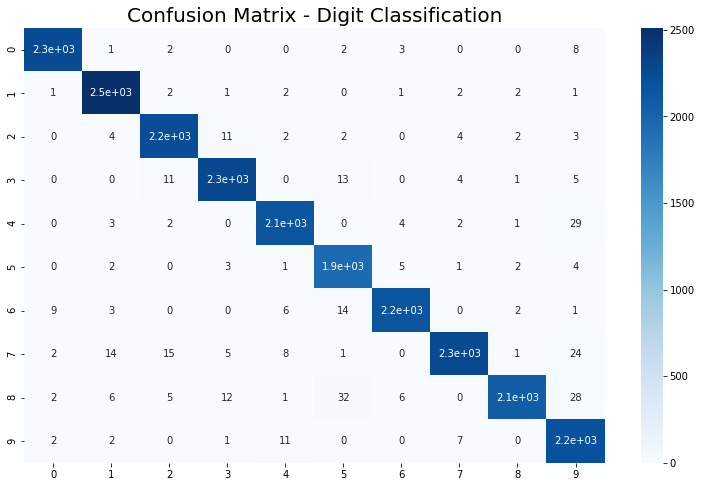

In [25]:
### Generate the Confusion Matrix

y_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])
matrix = confusion_matrix(Y_test, y_predictions)

df_cm = pd.DataFrame(matrix, index = [i for i in '0123456789'], columns = [i for i in "0123456789"])
plt.figure(figsize = (13,8))
plt.title('Confusion Matrix - Digit Classification', fontsize = 20)
sn.heatmap(df_cm, annot=True, cmap="Blues")

In [26]:
test = pd.read_csv(path + 'test.csv')
X_test_actual = test.values

In [27]:
X_test_actual.shape

(28000, 784)

In [28]:
X_test_actual = X_test_actual.reshape(28000, 28, 28, 1)

In [29]:
y_pred = model.predict(X_test_actual)

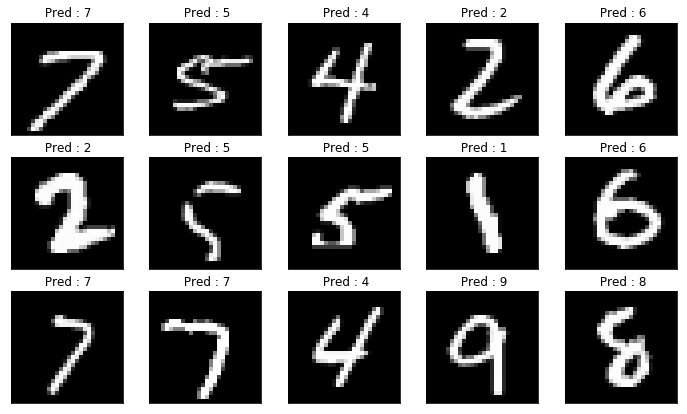

In [30]:
fig = plt.figure(figsize=(12,7))
for i in range(30, 45):
    plt.subplot(3,5,i-29)
    plt.title(' Pred : '+str(np.argmax(y_pred[i])))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X_test_actual[i],(28, 28)), cmap = 'gray')

In [31]:
img_ids = []
labels = []
for i in range(test.shape[0]):
    img_ids.append(i+1)
    labels.append(np.argmax(y_pred[i]))

result = pd.DataFrame({'ImageId':img_ids, 'Label':labels})

In [21]:
result.to_csv('digit_recognition_using_cnn.csv', index = False)